# Data Science Analisys of 2023

library import

In [55]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn as sk
import geopandas as gpd
import pycountry

## Exploratory analysis of  dataset

### Visualization of dataset:

In [4]:
Data = pd.read_csv('ds_salaries.csv')
Data.head(10)

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2023,SE,FT,Principal Data Scientist,80000,EUR,85847,ES,100,ES,L
1,2023,MI,CT,ML Engineer,30000,USD,30000,US,100,US,S
2,2023,MI,CT,ML Engineer,25500,USD,25500,US,100,US,S
3,2023,SE,FT,Data Scientist,175000,USD,175000,CA,100,CA,M
4,2023,SE,FT,Data Scientist,120000,USD,120000,CA,100,CA,M
5,2023,SE,FT,Applied Scientist,222200,USD,222200,US,0,US,L
6,2023,SE,FT,Applied Scientist,136000,USD,136000,US,0,US,L
7,2023,SE,FT,Data Scientist,219000,USD,219000,CA,0,CA,M
8,2023,SE,FT,Data Scientist,141000,USD,141000,CA,0,CA,M
9,2023,SE,FT,Data Scientist,147100,USD,147100,US,0,US,M


### Column description:


Data Science Job Salaries Dataset contains 11 columns, each are:

1. **_work_year:_** The year the salary was paid.
2. **experience_level**: The experience level in the job during the year
3. **employment_type:** The type of employment for the role
4. **job_title:** The role worked in during the year.
5. **salary:** The total gross salary amount paid.
6. **salary_currency:** The currency of the salary paid as an ISO 4217 currency code.
7. **salaryinusd:** The salary in USD
8. **employee_residence:** Employee's primary country of residence in during the work year as an ISO 3166 country code.
9. **remote_ratio:** The overall amount of work done remotely
10. **company_location:** The country of the employer's main office or contracting branch
11. **company_size:** The median number of people that worked for the company during the year

### Data types of datset:

In [5]:
Data.dtypes

work_year              int64
experience_level      object
employment_type       object
job_title             object
salary                 int64
salary_currency       object
salary_in_usd          int64
employee_residence    object
remote_ratio           int64
company_location      object
company_size          object
dtype: object

## Localization of the employee vs company location:
We are going to use the library of geopandas to have an idea of location of empleoyees and companies.

In [19]:
# Crear un DataFrame desde value_counts
Empl_Counts = Data['employee_residence'].value_counts().reset_index()
Empl_Counts.columns = ['employee_residence', 'value']  # Renombrar columnas


In [13]:
Comp_Counts=Data['company_location'].value_counts()
print(Comp_Counts)

company_location
US    3040
GB     172
CA      87
ES      77
IN      58
      ... 
CN       1
NZ       1
CL       1
MD       1
MT       1
Name: count, Length: 72, dtype: int64


In [40]:
url = "https://raw.githubusercontent.com/nvkelso/natural-earth-vector/master/geojson/ne_110m_admin_0_countries.geojson"
world = gpd.read_file(url)
world.columns
print(world['ISO_A2'].unique())
print(Empl_Counts['employee_residence'].unique())


# Función para convertir ISO alpha-3 a alpha-2
def convert_to_alpha2(alpha3):
    try:
        return pycountry.countries.get(alpha_3=alpha3).alpha_2
    except AttributeError:
        return None

# Agregar columna con códigos ISO alpha-2 al GeoDataFrame
world['ISO_A2'] = world['SOV_A3'].apply(convert_to_alpha2)


['FJ' 'TZ' 'EH' 'CA' 'US' 'KZ' 'UZ' 'PG' 'ID' 'AR' 'CL' 'CD' 'SO' 'KE'
 'SD' 'TD' 'HT' 'DO' 'RU' 'BS' 'FK' '-99' 'GL' 'TF' 'TL' 'ZA' 'LS' 'MX'
 'UY' 'BR' 'BO' 'PE' 'CO' 'PA' 'CR' 'NI' 'HN' 'SV' 'GT' 'BZ' 'VE' 'GY'
 'SR' 'EC' 'PR' 'JM' 'CU' 'ZW' 'BW' 'NA' 'SN' 'ML' 'MR' 'BJ' 'NE' 'NG'
 'CM' 'TG' 'GH' 'CI' 'GN' 'GW' 'LR' 'SL' 'BF' 'CF' 'CG' 'GA' 'GQ' 'ZM'
 'MW' 'MZ' 'SZ' 'AO' 'BI' 'IL' 'LB' 'MG' 'PS' 'GM' 'TN' 'DZ' 'JO' 'AE'
 'QA' 'KW' 'IQ' 'OM' 'VU' 'KH' 'TH' 'LA' 'MM' 'VN' 'KP' 'KR' 'MN' 'IN'
 'BD' 'BT' 'NP' 'PK' 'AF' 'TJ' 'KG' 'TM' 'IR' 'SY' 'AM' 'SE' 'BY' 'UA'
 'PL' 'AT' 'HU' 'MD' 'RO' 'LT' 'LV' 'EE' 'DE' 'BG' 'GR' 'TR' 'AL' 'HR'
 'CH' 'LU' 'BE' 'NL' 'PT' 'ES' 'IE' 'NC' 'SB' 'NZ' 'AU' 'LK' 'CN' 'CN-TW'
 'IT' 'DK' 'GB' 'IS' 'AZ' 'GE' 'PH' 'MY' 'BN' 'SI' 'FI' 'SK' 'CZ' 'ER'
 'JP' 'PY' 'YE' 'SA' 'AQ' 'CY' 'MA' 'EG' 'LY' 'ET' 'DJ' 'UG' 'RW' 'BA'
 'MK' 'RS' 'ME' 'TT' 'SS']
['US' 'GB' 'CA' 'ES' 'IN' 'DE' 'FR' 'PT' 'BR' 'GR' 'NL' 'AU' 'MX' 'PK'
 'IT' 'IE' 'JP' 'NG' 'AR' 'AT' 'PL' 'BE' 'TR' 

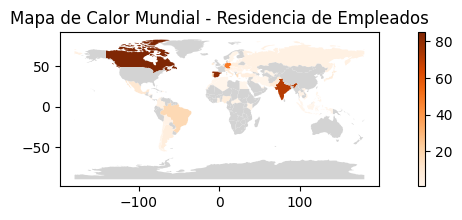

In [60]:
# Combinar datos con geometrías del GeoDataFrame
merged = world.merge(Empl_Counts, how='left', left_on='ISO_A2', right_on='employee_residence')

# Graficar el mapa de calor

ax = merged.plot(
    column='value',       # Columna con los datos para el mapa de calor
    cmap='Oranges',        # Paleta de colores
    legend=True,          # Mostrar barra de colores
    missing_kwds={
        "color": "lightgrey",  # Color para países sin datos
        "label": "No data"
    },
    figsize=(10,2)
)


# Personalizar el gráfico
plt.title("Mapa de Calor Mundial - Residencia de Empleados")
plt.show()
